In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Se18_19
Se18_19 = pd.read_csv("Se18_19.csv")

# Se19_20
Se19_20 = pd.read_csv("Se19_20.csv")

# Se20_21
Se20_21 = pd.read_csv("Se20_21.csv")

# Se21_22
Se21_22 = pd.read_csv("Se21_22.csv")

In [5]:
combined_df = pd.concat([Se18_19, Se19_20, Se20_21, Se21_22], ignore_index=True)
print(combined_df.columns.tolist())

['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA', 'Time', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'Avg

In [6]:
# Data processing

combined_df = pd.DataFrame(combined_df)
NA_Count = combined_df.isna().sum()
cols_wo_missing = NA_Count[NA_Count < 10].index.tolist()
combined_df = combined_df[cols_wo_missing]
combined_df = combined_df.dropna()
# Removing a corrupt data point
combined_df = combined_df[combined_df['HTR'] != True]
# Creating month column from Date
combined_df['month'] = combined_df['Date'].str[3:5]
# EDA Skip columns
skip_cols = ["Div", "Date", "HomeTeam", "AwayTeam", "HTHG", "HTAG", "HTR", "Referee", "HS", "AS", "HST", "AST", "HF", "AF", "HC", "AC", "HY", "AY", "HR", "AR", "B365H", "B365D", "B365A", "BWH", "BWD", "BWA", "IWH", "IWD", "IWA", "PSH", "PSD", "PSA", "WHH", "WHD", "WHA", "VCH", "VCD", "VCA", "PSCH", "PSCD", "PSCA", "Season"]


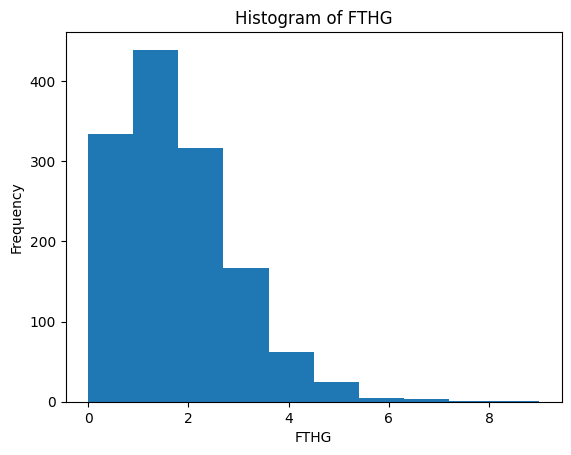

In [7]:
# Create a histogram
plt.hist(combined_df["FTHG"])

# Add labels and title
plt.xlabel('FTHG')
plt.ylabel('Frequency')
plt.title('Histogram of FTHG')

# Show the plot
plt.show()


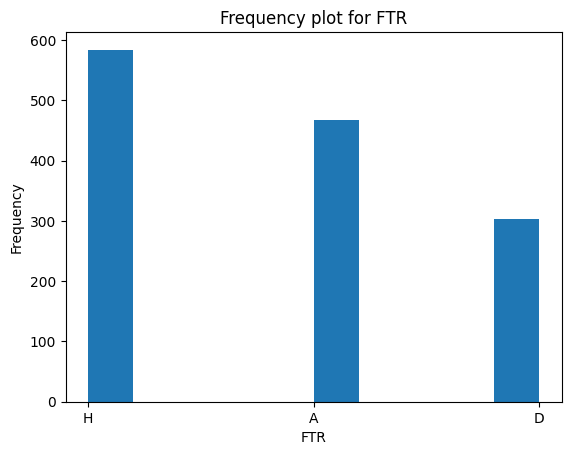

In [8]:
# Create a histogram
plt.hist(combined_df["FTR"])

# Add labels and title
plt.xlabel('FTR')
plt.ylabel('Frequency')
plt.title('Frequency plot for FTR')

# Show the plot
plt.show()


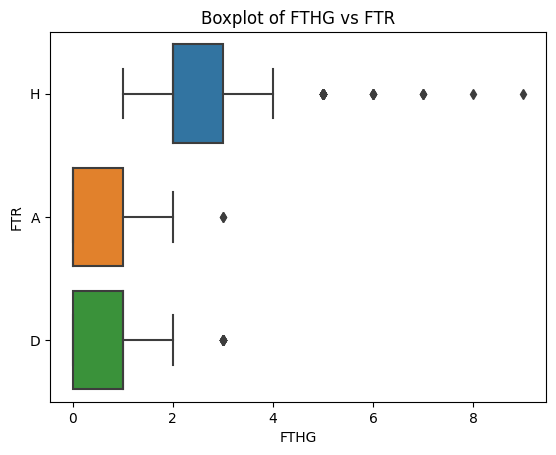

In [11]:
# Create a boxplot
sns.boxplot(x=combined_df["FTHG"], y= combined_df["FTR"], data=combined_df)

# Add labels and title
plt.xlabel('FTHG')
plt.ylabel('FTR')
plt.title('Boxplot of FTHG vs FTR')

# Show the plot
plt.show()


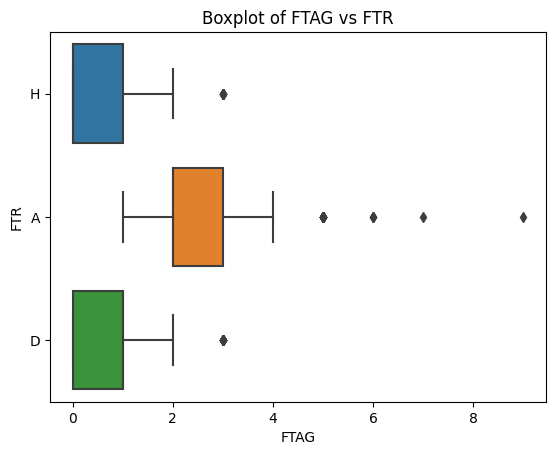

In [12]:
# Create a boxplot
sns.boxplot(x=combined_df["FTAG"], y= combined_df["FTR"], data=combined_df)

# Add labels and title
plt.xlabel('FTAG')
plt.ylabel('FTR')
plt.title('Boxplot of FTAG vs FTR')

# Show the plot
plt.show()


In [25]:
import pandas as pd
import statsmodels.api as sm

# Filter the data to only include the previous three seasons
train = pd.concat([Se18_19, Se19_20, Se20_21], ignore_index=True)

# # Create the Poisson regression model for goals scored by the home team
# home_reg = sm.GLM(train['FTHG'], train[['HomeTeam', 'AwayTeam']], family=sm.families.Gamma(link=sm.families.links.log))

# # Fit the model
# result = home_reg.fit()


# Print the summary of the model
# print(home_reg.summary())

import statsmodels.api as sm

# # specify the link function
# link_function = sm.genmod.families.links.log

# # fit a Poisson regression model
# poisson_model = sm.GLM(train['FTHG'], train[['HomeTeam', 'AwayTeam']],
#                        family=sm.families.Poisson(link=sm.genmod.families.links.log))

# poisson_model.fit()
# # print model summary
# print(poisson_model.summary())

# import statsmodels

# model=statsmodels.GLM(train['FTHG'], train[['HomeTeam', 'AwayTeam']], family=sm.families.Gamma(link=sm.families.links.identity))
# results=model.fit()
# print(results.summary())


# glm_poisson_log = sm.GLM(train['FTHG'], train[['HomeTeam', 'AwayTeam']], family = sm.families.Poisson **()**)
# results = glm_poisson_log.fit()


mod = sm.glm(train['FTHG'], train[['HomeTeam', 'AwayTeam']], family=sm.families.Gamma(link=sm.families.links.log()))
reg = mod.fit()
print(reg.summary())


AttributeError: module 'statsmodels.api' has no attribute 'glm'